#downloading the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



df = pd.read_csv('/content/adult.data', header=None)

# Assign names to columns alphabetically
num_cols = len(df.columns)
column_names = [chr(65 + i) for i in range(num_cols - 1)] + ['Class']
df.columns = column_names

# Rename the last column to 'Class'
df.rename(columns={df.columns[-1]: 'Class'}, inplace=True)

print(df.head())

    A                  B       C           D   E                    F  \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   
3  53            Private  234721        11th   7   Married-civ-spouse   
4  28            Private  338409   Bachelors  13   Married-civ-spouse   

                    G               H       I        J     K  L   M  \
0        Adm-clerical   Not-in-family   White     Male  2174  0  40   
1     Exec-managerial         Husband   White     Male     0  0  13   
2   Handlers-cleaners   Not-in-family   White     Male     0  0  40   
3   Handlers-cleaners         Husband   Black     Male     0  0  40   
4      Prof-specialty            Wife   Black   Female     0  0  40   

                N   Class  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  
3   United-States   <=

In [2]:
cat=['B','D','F','G','H','I','J','N']

In [3]:
label_encoder = LabelEncoder()

# Encode categorical columns
encoded_df = df.copy()
for column in df.select_dtypes(include=['object']):
    encoded_df[column] = label_encoder.fit_transform(df[column])

encoded_df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,Class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


#dividing into two parts Party 1 and Party 2

In [4]:
import numpy as np
# List of column names excluding the first and last columns
columns_to_shuffle = df.columns[0:-1]

# Split the shuffled column names into two groups
split_index = len(columns_to_shuffle) // 2
group1_columns =list(columns_to_shuffle[:split_index]) + [df.columns[-1]]
group2_columns =list(columns_to_shuffle[split_index:]) + [df.columns[-1]]

# Create the two datasets
d1 = df[group1_columns]
d2 = df[group2_columns]
ed1 = encoded_df[group1_columns]
ed2 = encoded_df[group2_columns]

ed1.head()


,A,B,C,D,E,F,G,Class
0,39,7,77516,9,13,4,1,0
1,50,6,83311,9,13,2,4,0
2,38,4,215646,11,9,0,6,0
3,53,4,234721,1,7,2,6,0
4,28,4,338409,9,13,2,10,0


In [5]:
d2.head()

,H,I,J,K,L,M,N,Class
0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Husband,White,Male,0,0,13,United-States,<=50K
2,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Husband,Black,Male,0,0,40,United-States,<=50K
4,Wife,Black,Female,0,0,40,Cuba,<=50K


#split value

In [6]:
def tree_reg(X,y):
  X = X.dropna()  # Features (independent variables)

  # Create a Decision Tree classifier
  clf = DecisionTreeRegressor(random_state=42)
  clf.fit(X, y)

  feature_importances = clf.feature_importances_

  # Find the index of the most important feature
  top_split_index = feature_importances.argmax()

  # Find the name of the most important feature
  feature_names = X.columns
  top_split_criterion = feature_names[top_split_index]
  top_split_threshold = clf.tree_.threshold[0]

  # print("Topmost split criterion:", top_split_criterion)
  # print("Threshold value for split:", top_split_threshold)
  return top_split_threshold




In [7]:
def tree_cls(X,y):
  X = X.dropna()  # Features (independent variables)

  # Create a Decision Tree classifier
  clf = DecisionTreeClassifier(random_state=42)
  clf.fit(X, y)

  feature_importances = clf.feature_importances_

  # Find the index of the most important feature
  top_split_index = feature_importances.argmax()

  # Find the name of the most important feature
  feature_names = X.columns
  top_split_criterion = feature_names[top_split_index]
  top_split_threshold = clf.tree_.threshold[0]

  # print("Topmost split criterion:", top_split_criterion)
  # print("Threshold value for split:", top_split_threshold)
  return top_split_threshold



#utility function/score
we consider it to be information gain here
---



In [8]:
import pandas as pd
import numpy as np
def util(group1_columns, encoded_df):
    def entropy(labels):
        """Calculate the entropy of a list of labels."""
        _, counts = np.unique(labels, return_counts=True)
        probabilities = counts / counts.sum()
        return -sum(probabilities * np.log2(probabilities))

    def information_gain(data, column_name, target_name):
        """Calculate the information gain for a given column in a dataset."""
        # Calculate the entropy of the entire dataset
        total_entropy = entropy(data[target_name])

        # Calculate the weighted entropy after splitting on the values of the given column
        unique_values = data[column_name].unique()
        weighted_entropy = 0
        for value in unique_values:
            subset = data[data[column_name] == value]
            subset_entropy = entropy(subset[target_name])
            weighted_entropy += (len(subset) / len(data)) * subset_entropy

        # Calculate the information gain
        information_gain = total_entropy - weighted_entropy
        return information_gain

    df = encoded_df

    # Calculate information gain for a specific column
    # column_name = group1_columns

    target_name = 'Class'
    util1=[]
    for i in range(len(group1_columns)-1):
      gain = information_gain(df, group1_columns[i], target_name)
      util1.append(gain)
      #print("Information Gain for column", group1_columns[i], ":", gain)
    return util1

util1=util(group1_columns, encoded_df)
util1

[0.09921780194414098,
 0.021571590198122825,
 0.5680099241847916,
 0.09359084108861437,
 0.09359084108861437,
 0.15652786512566186,
 0.09292248395497071]

In [9]:
util2=util(group2_columns, encoded_df)
util2

[0.1653657579852149,
 0.008377946328510633,
 0.03717138743832116,
 0.12029533476003973,
 0.053351561612755116,
 0.061001939253475856,
 0.008695342020861085]

#RVP

In [ ]:
import random

def rand_value_protocol(range_start, range_end):
    """
    Generates a random value within the given range and returns two random values
    (r1 and r2) such that r = r1 + r2.

    """
    # Generate a random value within the given range
    r = random.randint(range_start, range_end)

    # Generate two random values (r1 and r2) such that r = r1 + r2
    r1 = random.randint(range_start, r)
    r2 = r - r1

    return r, r1, r2

#delta_u

In [10]:
utin=[]
for elem in util1:
  utin.append(-elem)
-max(utin)

0.021571590198122825

In [11]:
utim=[]
for elem in util2:
  utim.append(-elem)
-max(utim)

0.008377946328510633

In [12]:
delta_u=max(abs(max(util1)+max(utim)),abs(max(util2)+max(utin)))

#algo 2

In [ ]:
#algorithm 2

In [13]:
import random
import math


def add(a, b):

    return a + b

def comparison(r1, r2, l1, l2):

    r_sum = add(r1, r2)
    l_sum = add(l1, l2)
    if r_sum > l_sum:
        return 1
    else:
        return 0

def find_column_with_utility(j, n, epsilon, delta_u, l, util1, util2):

    # Initialize s1 and s2
    s1 = 0
    s2 = 0


    # Calculate s1 and s2
    for i in range(j):
        s1 += math.floor(math.exp(epsilon * (util1[i] / (2 * delta_u)))*10**l)
    for i in range(j , n):
        s2 += math.floor(math.exp(epsilon * (util2[i-j] / (2 * delta_u)))*10**l)

    # print(s1)
    # print(s2)

    # Generate a random value r in the specified range


    r = random.randint(0, s1+s2)

    # Generate r1 and r2 such that r1 <= j and r2 <= n - j

    r1 = random.randint(0, r)
    r2 = r - r1
    # print(r1)
    # print(r2)

    # Initialize l1 and l2
    l1 = 0
    l2 = 0

    # Iterate over k
    for k in range(0, n):
        if k < j:
            l1 += math.floor(math.exp(epsilon * (util1[k] / (2 * delta_u)))*10**l)

        else:
            l1 = s1
            l2 += math.floor(math.exp(epsilon * (util2[k-j] / (2 * delta_u)))*10**l)


        # Compare r1 + r2 with l1 + l2
        if comparison(r1, r2, l1, l2) == 0:
            return k



#SSPP

In [ ]:
from Crypto.Protocol.SecretSharing import Shamir
from Crypto.Random import get_random_bytes

class SSPP:
    def __init__(self, modulus, threshold, vector_size):
        self.modulus = modulus
        self.threshold = threshold
        self.vector_size = vector_size

    def generate_shares(self, secret):
        # Generate random polynomial coefficients for secret sharing
        coefficients = [int.from_bytes(get_random_bytes(16), "big") % self.modulus for _ in range(self.threshold)]
        # Generate shares for the secret using Shamir's Secret Sharing
        shares = Shamir.split(self.threshold, self.vector_size, secret, coefficients, self.modulus)
        return shares

    def reconstruct_secret(self, shares):
        # Reconstruct the secret from shares using Shamir's Secret Sharing
        secret = Shamir.combine(shares)
        return secret

    def secure_scalar_product(self, vector_a, vector_b):
        if len(vector_a) != len(vector_b) or len(vector_a) != self.vector_size:
            raise ValueError("Vector size mismatch")

        # Generate random scalar for each vector element
        scalars_a = [int.from_bytes(get_random_bytes(16), "big") % self.modulus for _ in range(self.vector_size)]
        scalars_b = [int.from_bytes(get_random_bytes(16), "big") % self.modulus for _ in range(self.vector_size)]

        # Share each scalar with the other party
        shares_a = [self.generate_shares(scalar_a) for scalar_a in scalars_a]
        shares_b = [self.generate_shares(scalar_b) for scalar_b in scalars_b]

        # Compute the shares of the product
        shares_product = [[(share_a * share_b) % self.modulus for share_a, share_b in zip(shares_a[i], shares_b[i])] for i in range(self.vector_size)]

        # Reconstruct the shares of the product to obtain the scalar product
        scalar_product = [self.reconstruct_secret([shares_product[j][i] for j in range(self.vector_size)]) for i in range(self.threshold)]

        return scalar_product

# Example usage:
if __name__ == "__main__":
    modulus = 2**256 - 189
    threshold = 3
    vector_size = 5

    # Initialize SSPP object
    sspp = SSPP(modulus, threshold, vector_size)

    # Define input vectors
    vector_a = [1, 2, 3, 4, 5]
    vector_b = [5, 4, 3, 2, 1]

    # Compute secure scalar product
    secure_product = sspp.secure_scalar_product(vector_a, vector_b)
    print("Secure scalar product:", secure_product)


#Laplacian noise addition

In [14]:

def divide_randomly(number):

    part1 = random.randint(0, number)
    part2 = number - part1

    return part1, part2

In [15]:
import numpy as np

def add_laplacian_noise(part1, part2, epsilon, sensitivity=2):

    scale = sensitivity / epsilon
    noise1 = np.random.laplace(scale=scale)
    noise2 = np.random.laplace(scale=scale)
    return part1 + noise1 - noise2, part2-noise1+noise2



#algo 3

In [16]:
def split(w,df):
  grp=1
  if w>=7:
    w-=7
    grp=2
  if grp==2:
    if group2_columns[w] not in cat:
        split_value=tree_reg(df[[group2_columns[w]]], df['Class'])
    else:
        split_value=tree_cls(df[[group2_columns[w]]], df['Class'])
    df_part1 = df[df[group2_columns[w]] > split_value]
    df_part2 = df[df[group2_columns[w]] <= split_value]
    dg.append([encoded_df.columns[w+7], split_value])

  else:
    if group1_columns[w] not in cat:
        split_value=tree_reg(df[[group1_columns[w]]], df['Class'])
    else:
        split_value=tree_cls(df[[group1_columns[w]]], df['Class'])
    df_part1 = df[df[group2_columns[w]] > split_value]
    df_part2 = df[df[group2_columns[w]] <= split_value]
    dg.append([encoded_df.columns[w], split_value])

  util1=[x+y for x, y in zip(util(group1_columns, df_part1), util(group1_columns, df_part2))]
  util2=[x+y for x, y in zip(util(group2_columns, df_part1), util(group2_columns, df_part2))]

  # return [df_part1, df_part2]



#e=1

In [50]:
e=1

In [51]:
dg=[]
w_all=[]
for i in range(5):

  w=find_column_with_utility(7, 14, 1, delta_u, 3, util1, util2)
  while (w in w_all):
    w=find_column_with_utility(7, 14, 1, delta_u, 3, util1, util2)
  split(w, encoded_df)
  w_all.append(w)

dg

[['B', 4.5], ['F', 2.5], ['C', 209923.0], ['I', 3.5], ['D', 6.5]]

In [52]:
w_all

[1, 5, 2, 8, 3]

In [53]:
dg

[['B', 4.5], ['F', 2.5], ['C', 209923.0], ['I', 3.5], ['D', 6.5]]

In [54]:
len(dg)

5

In [55]:
import pandas as pd

df1 = ed1.copy()
df2 = ed2.copy()
diff=[]
for i in range(len(dg)):
  if dg[i][0] not in d1:
    df1[dg[i][0]]=[0 if (x<dg[i][1] or x==None) else 1 for x in df2[dg[i][0]]]
    diff.append(dg[i][0])


In [56]:
print(df1)

        A  B       C   D   E  F   G  Class  I
0      39  7   77516   9  13  4   1      0  1
1      50  6   83311   9  13  2   4      0  1
2      38  4  215646  11   9  0   6      0  1
3      53  4  234721   1   7  2   6      0  0
4      28  4  338409   9  13  2  10      0  0
...    .. ..     ...  ..  .. ..  ..    ... ..
32556  27  4  257302   7  12  2  13      0  1
32557  40  4  154374  11   9  2   7      1  1
32558  58  4  151910  11   9  6   1      0  1
32559  22  4  201490  11   9  4   1      0  1
32560  52  5  287927  11   9  2   4      1  1

[32561 rows x 9 columns]


In [57]:
df1['Class'], df1[diff[-1]]=df1[diff[-1]], df1['Class']
df1 = df1.rename(columns={diff[-1]: 'Class', 'Class':diff[-1]})
df1

,A,B,C,D,E,F,G,I,Class
0,39,7,77516,9,13,4,1,1,0
1,50,6,83311,9,13,2,4,1,0
2,38,4,215646,11,9,0,6,1,0
3,53,4,234721,1,7,2,6,0,0
4,28,4,338409,9,13,2,10,0,0
...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,1,0
32557,40,4,154374,11,9,2,7,1,1
32558,58,4,151910,11,9,6,1,1,0
32559,22,4,201490,11,9,4,1,1,0


In [58]:
diff=[]
for i in range(len(dg)):
  if dg[i][0] not in d2:
    df2[dg[i][0]]=[0 if (x<dg[i][1] or x==None) else 1 for x in df1[dg[i][0]]]
    diff.append(dg[i][0])





In [59]:
print(df2)

       H  I  J      K  L   M   N  Class  B  F  C  D
0      1  4  1   2174  0  40  39      0  1  1  0  1
1      0  4  1      0  0  13  39      0  1  0  0  1
2      1  4  1      0  0  40  39      0  0  0  1  1
3      0  2  1      0  0  40  39      0  0  0  1  0
4      5  2  0      0  0  40   5      0  0  0  1  1
...   .. .. ..    ... ..  ..  ..    ... .. .. .. ..
32556  5  4  0      0  0  38  39      0  0  0  1  1
32557  0  4  1      0  0  40  39      1  0  0  0  1
32558  4  4  0      0  0  40  39      0  0  1  0  1
32559  3  4  1      0  0  20  39      0  0  1  0  1
32560  5  4  0  15024  0  40  39      1  1  0  1  1

[32561 rows x 12 columns]


In [60]:
df2['Class'], df2[diff[-1]]=df2[diff[-1]], df2['Class']
df2 = df2.rename(columns={diff[-1]: 'Class', 'Class':diff[-1]})
df2

,H,I,J,K,L,M,N,D,B,F,C,Class
0,1,4,1,2174,0,40,39,1,1,1,0,0
1,0,4,1,0,0,13,39,1,1,0,0,0
2,1,4,1,0,0,40,39,1,0,0,1,0
3,0,2,1,0,0,40,39,0,0,0,1,0
4,5,2,0,0,0,40,5,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,5,4,0,0,0,38,39,1,0,0,1,0
32557,0,4,1,0,0,40,39,1,0,0,0,1
32558,4,4,0,0,0,40,39,1,0,1,0,0
32559,3,4,1,0,0,20,39,1,0,1,0,0


#Testing

In [61]:
df_original = df1
df_combined = df2
df_differential = encoded_df



#Training a simple regression model

In [62]:
bar={1:[], 0.5:[], 0.1:[]}

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df=df_original

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classification model (example: Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
bar[1].append(accuracy)


Accuracy: 0.7587901120835252


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = df_combined

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classification model (example: Logistic Regression)
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
bar[1].append(accuracy)

Accuracy: 0.8062336864732075


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = df_differential

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classification model (example: Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
bar[1].append(accuracy)

Accuracy: 0.7894979272224781


In [66]:
bar

{1: [0.7587901120835252, 0.8062336864732075, 0.7894979272224781],
 0.5: [],
 0.1: []}

#e=0.5

In [67]:
e=0.5

In [68]:
dg=[]
w_all=[]
for i in range(5):

  w=find_column_with_utility(7, 14, 0.5, delta_u, 3, util1, util2)
  while (w in w_all):
    w=find_column_with_utility(7, 14, 0.5, delta_u, 3, util1, util2)
  split(w, encoded_df)
  w_all.append(w)

dg

[['H', 0.5], ['F', 2.5], ['C', 209923.0], ['G', 9.5], ['N', 35.5]]

In [69]:
df1 = ed1.copy()
df2 = ed2.copy()
diff=[]
for i in range(len(dg)):
  if dg[i][0] not in d1:
    df1[dg[i][0]]=[0 if (x<dg[i][1] or x==None) else 1 for x in df2[dg[i][0]]]
    diff.append(dg[i][0])

df1['Class'], df1[diff[-1]]=df1[diff[-1]], df1['Class']
df1 = df1.rename(columns={diff[-1]: 'Class', 'Class':diff[-1]})
df1

,A,B,C,D,E,F,G,N,H,Class
0,39,7,77516,9,13,4,1,1,1,0
1,50,6,83311,9,13,2,4,1,0,0
2,38,4,215646,11,9,0,6,1,1,0
3,53,4,234721,1,7,2,6,1,0,0
4,28,4,338409,9,13,2,10,0,1,0
...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,1,1,0
32557,40,4,154374,11,9,2,7,1,0,1
32558,58,4,151910,11,9,6,1,1,1,0
32559,22,4,201490,11,9,4,1,1,1,0


In [70]:
diff=[]
for i in range(len(dg)):
  if dg[i][0] not in d2:
    df2[dg[i][0]]=[0 if (x<dg[i][1] or x==None) else 1 for x in df1[dg[i][0]]]
    diff.append(dg[i][0])

df2['Class'], df2[diff[-1]]=df2[diff[-1]], df2['Class']
df2 = df2.rename(columns={diff[-1]: 'Class', 'Class':diff[-1]})
df2

,H,I,J,K,L,M,N,G,F,C,Class
0,1,4,1,2174,0,40,39,0,1,0,0
1,0,4,1,0,0,13,39,0,0,0,0
2,1,4,1,0,0,40,39,0,0,1,0
3,0,2,1,0,0,40,39,0,0,1,0
4,5,2,0,0,0,40,5,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,5,4,0,0,0,38,39,1,0,1,0
32557,0,4,1,0,0,40,39,0,0,0,1
32558,4,4,0,0,0,40,39,0,1,0,0
32559,3,4,1,0,0,20,39,0,1,0,0


#Testing

In [71]:
df_original = df1
df_combined = df2
df_differential = encoded_df

#Training a simple regression model

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = df_original

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classification model (example: Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
bar[0.5].append(accuracy)

Accuracy: 0.7587901120835252


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = df_combined

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classification model (example: Logistic Regression)
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
bar[0.5].append(accuracy)


Accuracy: 0.8093044679871028


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
bar[0.5].append(0.7894979272224781)

#e=0.1

In [75]:
e=0.1

In [76]:
dg=[]
w_all=[]
for i in range(5):

  w=find_column_with_utility(7, 14, 0.5, delta_u, 3, util1, util2)
  while (w in w_all):
    w=find_column_with_utility(7, 14, 0.5, delta_u, 3, util1, util2)
  split(w, encoded_df)
  w_all.append(w)

dg

[['F', 2.5], ['D', 6.5], ['N', 35.5], ['B', 4.5], ['C', 209923.0]]

In [77]:
df1 = ed1.copy()
df2 = ed2.copy()
diff=[]
for i in range(len(dg)):
  if dg[i][0] not in d1:
    df1[dg[i][0]]=[0 if (x<dg[i][1] or x==None) else 1 for x in df2[dg[i][0]]]
    diff.append(dg[i][0])

df1['Class'], df1[diff[-1]]=df1[diff[-1]], df1['Class']
df1 = df1.rename(columns={diff[-1]: 'Class', 'Class':diff[-1]})
df1

,A,B,C,D,E,F,G,N,Class
0,39,7,77516,9,13,4,1,1,0
1,50,6,83311,9,13,2,4,1,0
2,38,4,215646,11,9,0,6,1,0
3,53,4,234721,1,7,2,6,1,0
4,28,4,338409,9,13,2,10,0,0
...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,1,0
32557,40,4,154374,11,9,2,7,1,1
32558,58,4,151910,11,9,6,1,1,0
32559,22,4,201490,11,9,4,1,1,0


In [78]:
diff=[]
for i in range(len(dg)):
  if dg[i][0] not in d2:
    df2[dg[i][0]]=[0 if (x<dg[i][1] or x==None) else 1 for x in df1[dg[i][0]]]
    diff.append(dg[i][0])

df2['Class'], df2[diff[-1]]=df2[diff[-1]], df2['Class']
df2 = df2.rename(columns={diff[-1]: 'Class', 'Class':diff[-1]})
df2

,H,I,J,K,L,M,N,C,F,D,B,Class
0,1,4,1,2174,0,40,39,0,1,1,1,0
1,0,4,1,0,0,13,39,0,0,1,1,0
2,1,4,1,0,0,40,39,1,0,1,0,0
3,0,2,1,0,0,40,39,1,0,0,0,0
4,5,2,0,0,0,40,5,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,5,4,0,0,0,38,39,1,0,1,0,0
32557,0,4,1,0,0,40,39,0,0,1,0,1
32558,4,4,0,0,0,40,39,0,1,1,0,0
32559,3,4,1,0,0,20,39,0,1,1,0,0


#Testing

In [79]:
df_original = df1
df_combined = df2
df_differential = encoded_df

#Training a simple regression model

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = df_original

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classification model (example: Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
bar[0.1].append(accuracy)


Accuracy: 0.7587901120835252


In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = df_combined

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']                 # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classification model (example: Logistic Regression)
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
bar[0.1].append(accuracy)


Accuracy: 0.8073084600030708


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:

bar[0.1].append(0.7894979272224781)

In [85]:
bar[0.1]

[0.7587901120835252, 0.8073084600030708, 0.7894979272224781]

In [86]:
bar

{1: [0.7587901120835252, 0.8062336864732075, 0.7894979272224781],
 0.5: [0.7587901120835252, 0.8093044679871028, 0.7894979272224781],
 0.1: [0.7587901120835252, 0.8073084600030708, 0.7894979272224781],
 '0.1': [0.7587901120835252, 0.8056195301704284, 0.7894979272224781]}

In [89]:
# i made a small mistake in the above bar dictionary and so as to not have to run
# the whole code again i copied the useful contents into bar_results
bar_results={}
bar_results[1]=bar[1]
bar_results[0.5]=bar[0.5]
bar_results[0.1]=bar[0.1]
bar_results

{1: [0.7587901120835252, 0.8062336864732075, 0.7894979272224781],
 0.5: [0.7587901120835252, 0.8093044679871028, 0.7894979272224781],
 0.1: [0.7587901120835252, 0.8073084600030708, 0.7894979272224781]}

#Resuts

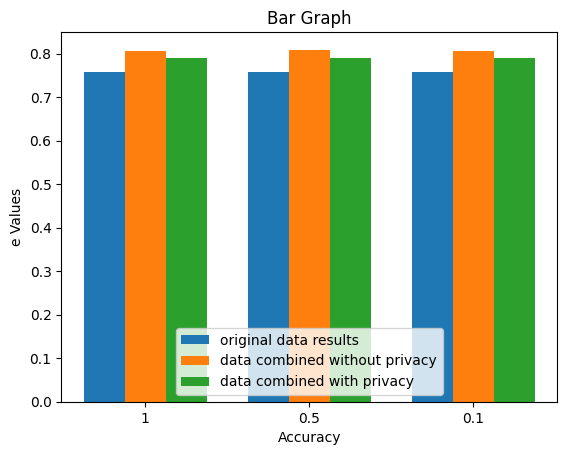

In [90]:
import matplotlib.pyplot as plt
import numpy as np

data = bar_results

# Extract keys and values from the dictionary
keys = list(data.keys())
values = list(data.values())

# Convert values to numpy array for easier manipulation
values = np.array(values)

# Get number of groups and number of bars per group
num_groups, num_bars = values.shape

# Define bar width and positions
bar_width = 0.25
index = np.arange(num_groups)

# Plot each bar
labels=['original data results', 'data combined without privacy', 'data combined with privacy']
for i in range(num_bars):
    plt.bar(index + i * bar_width, values[:, i], bar_width, label=f'{labels[i]}')

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('e Values')
plt.title('Bar Graph')
plt.xticks(index + bar_width, keys)
plt.legend()

# Show the plot
plt.show()
